In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Collecting and Scraping Data from Melon

In [291]:
titles = []
artists = []
release_dates = []
genres = []
num_comments = []
num_likes = []
num_promos = []
follower_counts = []
lyric_lengths = []

# Open chrome window to Melon Top 100 webpage to extract HTML
driver = webdriver.Chrome()
driver.get('https://www.melon.com/chart/day/index.htm')
time.sleep(1)  

# Find all genre links on Melon Daily by finding href value
genre_links = driver.find_elements(By.CSS_SELECTOR, 'a.link_tab')[3:]
hrefs = []
for genre_link in genre_links:
    hrefs.append(genre_link.get_attribute('href'))

    
# Parse information of each song
for href in hrefs:
    driver.get(href)
    time.sleep(1)

    # Find all song information links on Top 100
    top_100_links = driver.find_elements(By.CSS_SELECTOR, 'a.song_info')
    
    for song_link in top_100_links:
        song_link.click()
        time.sleep(1)
        html = driver.page_source
    
        # Count all promo videos
        promo_links = driver.find_elements(By.CSS_SELECTOR, 'a.ellipsis.album_name')
        num_promo = len(promo_links) - 2
        # individual song parsing
        parsed = bs(html, 'html.parser')

        title = parsed.find('div', {'class:', 'song_name'}).strong.next_sibling.strip()
        artist = parsed.find('a', {'class:', 'artist_name'}).text.strip()
        release_date = parsed.find('dt', text='발매일').find_next_sibling('dd').text.strip()
        genre = parsed.find('dt', text='장르').find_next_sibling('dd').text.strip()
        num_comment = parsed.find('dt', text='댓글').find_next_sibling('dd').text.strip()[:-1]
        num_like = parsed.find('span', {'id': 'd_like_count'}).text.strip()
        # After each lyric line is a <br> tag
        try:
            lyric_length = len(parsed.find('div', {'class:', 'lyric'})('br'))
        except TypeError:
            lyric_length = 0

        artist_link = driver.find_elements(By.CSS_SELECTOR, 'a.artist_name')[0]
        artist_link.click()
        time.sleep(1)
        html = driver.page_source
        parsed = bs(html, 'html.parser')
        follower_count = parsed.find('span', {'id': 'd_like_count'}).text.strip()

        driver.back()
        driver.back()
        time.sleep(1)
        driver.execute_script("window.scrollTo(0, 0)")
        
        titles.append(title)
        artists.append(artist)
        release_dates.append(release_date)
        genres.append(genre)
        num_comments.append(num_comment)
        num_likes.append(num_like)
        num_promos.append(num_promo)
        follower_counts.append(follower_count)
        lyric_lengths.append(lyric_length)
    
driver.quit()

AttributeError: 'NoneType' object has no attribute 'text'

In [292]:
df = pd.DataFrame()

In [293]:
df['titles'] = titles
df['artists'] = artists
df['release_date'] = release_dates
df['genres'] = genres
df['num_comments'] = num_comments
df['num_likes'] = num_likes
df['num_promos'] = num_promos
df['follower_counts'] = follower_counts
df['lyric_lengths'] = lyric_lengths

In [294]:
display(df)

,titles,artists,release_date,genres,num_comments,num_likes,num_promos,follower_counts,lyric_lengths
0,사랑하기 싫어,지아,2023.02.24,발라드,289,"28,217",0,"38,357",32
1,너를 보는게 지친 하루에,송하예,2023.03.19,발라드,0,"15,463",2,"16,406",30
2,사랑인가 봐,멜로망스,2022.02.18,"발라드, 국내드라마",256,"181,361",2,"87,991",24
3,너의 모든 순간,성시경,2014.02.12,"발라드, 국내드라마",453,"257,711",0,"116,656",30
4,나비무덤,포맨 (4MEN),2023.03.01,발라드,93,"16,493",2,"42,728",50
...,...,...,...,...,...,...,...,...,...
2026,거미가 줄을 타고 올라갑니다,뽀로로,2017.05.10,"키즈, 창작동요",1,"2,076",1,"13,119",18
2027,하츄핑송,조경이,2021.01.29,"키즈, 창작동요",9,"3,588",0,48,18
2028,반짝반짝 캐치! 티니핑 주제곡,이정은,2021.09.15,"애니메이션/웹툰, 키즈, 만화",6,"4,276",1,357,18
2029,나비야,핑크퐁,2015.08.01,"키즈, 창작동요",1,"1,809",0,"11,789",0


In [237]:
print(num_comments)
print(num_likes)

['289', '56', '256', '453', '93', '8,567', '190', '277', '133', '77', '407', '198', '38', '893', '328', '3,777', '417', '1,073', '337', '93', '156', '61', '61', '2,231', '43', '48', '59', '742', '87', '58', '3,196', '75', '120', '557', '330', '14', '508', '18', '1,115', '22', '75', '49', '39', '2,451', '205', '849', '655', '226', '232', '784', '567', '2,460', '248', '623', '35', '181', '104', '2,071', '14', '1,103', '271', '42', '229', '166', '146', '1,360', '194', '8', '1,942', '704', '364', '54', '1,467', '77', '208', '9', '393', '162', '594', '100', '80', '228', '968', '527', '183', '253', '196', '243', '1,801', '75', '610', '42', '993', '49', '257', '90', '1,303', '84', '323', '4,895', '1,821', '1,247', '3,017', '2,001', '1,695', '1,605', '4,225', '1,137', '2,137', '2,542', '751', '3,559', '172', '1,956', '2,728', '7,235', '1,047', '1,771', '2,285', '480', '966', '19,340', '1,823', '1,620', '484', '7,901', '1,249', '5,637', '4,367', '1,001', '75', '193', '274', '396', '1,933', '883

### Using Spotify API to extract audio features for each song (assuming the song is also on Spotify)

In [295]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [296]:
client_id = '99feabc8352744bbbdab622026e8205e'
client_secret = '3639d0f7e62f4ffbba95b9dadfe0ab03'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [305]:
song_length = []
tempo = []
time_signature = []
key = []
mode = []
valence = []
danceability = []
energy = []
loudness = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []

track_ids = []
for title in df['titles']:
    results = sp.search(q=title, type='track', limit=1)
    if results['tracks']['total'] > 0:
        track_id = results['tracks']['items'][0]['id']
        track_ids.append(track_id)

for i in range(0, len(track_ids), 100):
    batch_track_ids = track_ids[i:i+100]
    features = sp.audio_features(batch_track_ids)
    for feature in features:
        song_length.append(feature['duration_ms'])
        tempo.append(feature['tempo'])
        time_signature.append(feature['time_signature'])
        key.append(feature['key'])
        mode.append(feature['mode'])
        valence.append(feature['valence'])
        danceability.append(feature['danceability'])
        energy.append(feature['energy'])
        loudness.append(feature['loudness'])
        speechiness.append(feature['speechiness'])
        acousticness.append(feature['acousticness'])
        instrumentalness.append(feature['instrumentalness'])
        liveness.append(feature['liveness'])

df['song_length'] = song_length
df['song_length'] = df.song_length.apply(lambda x: (x / 1000) / 60)
df['tempo'] = tempo
df['time_signature'] = time_signature
df['key'] = key
df['mode'] = mode
df['valence'] = valence
df['danceability'] = danceability
df['energy'] = energy
df['loudness'] = loudness
df['speechiness'] = speechiness
df['acousticness'] = acousticness
df['instrumentalness'] = instrumentalness
df['liveness'] = liveness

In [342]:
df.to_csv('melon_songs.csv', encoding='utf-8')

In [368]:
df = pd.read_csv('melon_songs.csv', index_col=0, encoding='utf-8')
pd.set_option('display.max_columns', None)
display(df)

,titles,artists,release_date,genres,num_comments,num_likes,num_promos,follower_counts,lyric_lengths,song_length,tempo,time_signature,key,mode,valence,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness
0,사랑하기 싫어,지아,2023.02.24,발라드,289,"28,217",0,"38,357",32,3.669550,133.722,4,5,1,0.311,0.442,0.692,-3.886,0.0473,0.729,0.000000,0.1850
1,너를 보는게 지친 하루에,송하예,2023.03.19,발라드,0,"15,463",2,"16,406",30,3.762883,75.337,4,11,1,0.256,0.437,0.560,-3.325,0.0301,0.365,0.000000,0.1780
2,사랑인가 봐,멜로망스,2022.02.18,"발라드, 국내드라마",256,"181,361",2,"87,991",24,3.083333,171.594,4,8,1,0.631,0.402,0.731,-3.529,0.0693,0.508,0.000000,0.1460
3,너의 모든 순간,성시경,2014.02.12,"발라드, 국내드라마",453,"257,711",0,"116,656",30,4.055400,139.982,4,10,1,0.244,0.366,0.385,-7.952,0.0336,0.816,0.000000,0.0872
4,나비무덤,포맨 (4MEN),2023.03.01,발라드,93,"16,493",2,"42,728",50,4.488883,68.197,4,4,1,0.189,0.466,0.503,-4.868,0.0367,0.555,0.000000,0.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,거미가 줄을 타고 올라갑니다,뽀로로,2017.05.10,"키즈, 창작동요",1,"2,076",1,"13,119",18,0.886400,124.991,4,4,1,0.970,0.915,0.627,-5.180,0.0403,0.732,0.000000,0.1550
2027,하츄핑송,조경이,2021.01.29,"키즈, 창작동요",9,"3,588",0,48,18,1.738467,130.048,4,0,1,0.734,0.884,0.737,-4.910,0.0968,0.289,0.000000,0.3320
2028,반짝반짝 캐치! 티니핑 주제곡,이정은,2021.09.15,"애니메이션/웹툰, 키즈, 만화",6,"4,276",1,357,18,1.353150,127.265,4,6,0,0.918,0.716,0.899,-5.052,0.0685,0.081,0.000004,0.0392
2029,나비야,핑크퐁,2015.08.01,"키즈, 창작동요",1,"1,809",0,"11,789",0,1.055133,159.919,4,11,1,0.796,0.616,0.696,-4.176,0.0587,0.220,0.000000,0.2920


# Data Cleaning and Manipulation

In [369]:
def convert_to_key(number):
    if (number == 0):
        return 'C'
    elif (number == 1):
        return 'C#'
    elif (number == 2):
        return 'D'
    elif (number == 3):
        return 'D#'
    elif (number == 4):
        return 'E'
    elif (number == 5):
        return 'F'
    elif (number == 6):
        return 'F#'
    elif (number == 7):
        return 'G'
    elif (number == 8):
        return 'G#'
    elif (number == 9):
        return 'A'
    elif (number == 10):
        return 'A#'
    elif (number == 11):
        return 'B'
    else:
        return 'na'

df['key'] = df.key.apply(lambda x: convert_to_key(x))

In [370]:
def convert_modes(mode):
    if (mode == 0):
        return 'Minor'
    elif (mode == 1):
        return 'Major'
    else:
        return 'na'
    
df['mode'] = df['mode'].apply(lambda x: convert_modes(x))

In [371]:
df['time_signature'] = df.time_signature.apply(lambda x: str(x) + '/4')

In [372]:
display(df)

,titles,artists,release_date,genres,num_comments,num_likes,num_promos,follower_counts,lyric_lengths,song_length,tempo,time_signature,key,mode,valence,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness
0,사랑하기 싫어,지아,2023.02.24,발라드,289,"28,217",0,"38,357",32,3.669550,133.722,4/4,F,Major,0.311,0.442,0.692,-3.886,0.0473,0.729,0.000000,0.1850
1,너를 보는게 지친 하루에,송하예,2023.03.19,발라드,0,"15,463",2,"16,406",30,3.762883,75.337,4/4,B,Major,0.256,0.437,0.560,-3.325,0.0301,0.365,0.000000,0.1780
2,사랑인가 봐,멜로망스,2022.02.18,"발라드, 국내드라마",256,"181,361",2,"87,991",24,3.083333,171.594,4/4,G#,Major,0.631,0.402,0.731,-3.529,0.0693,0.508,0.000000,0.1460
3,너의 모든 순간,성시경,2014.02.12,"발라드, 국내드라마",453,"257,711",0,"116,656",30,4.055400,139.982,4/4,A#,Major,0.244,0.366,0.385,-7.952,0.0336,0.816,0.000000,0.0872
4,나비무덤,포맨 (4MEN),2023.03.01,발라드,93,"16,493",2,"42,728",50,4.488883,68.197,4/4,E,Major,0.189,0.466,0.503,-4.868,0.0367,0.555,0.000000,0.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,거미가 줄을 타고 올라갑니다,뽀로로,2017.05.10,"키즈, 창작동요",1,"2,076",1,"13,119",18,0.886400,124.991,4/4,E,Major,0.970,0.915,0.627,-5.180,0.0403,0.732,0.000000,0.1550
2027,하츄핑송,조경이,2021.01.29,"키즈, 창작동요",9,"3,588",0,48,18,1.738467,130.048,4/4,C,Major,0.734,0.884,0.737,-4.910,0.0968,0.289,0.000000,0.3320
2028,반짝반짝 캐치! 티니핑 주제곡,이정은,2021.09.15,"애니메이션/웹툰, 키즈, 만화",6,"4,276",1,357,18,1.353150,127.265,4/4,F#,Minor,0.918,0.716,0.899,-5.052,0.0685,0.081,0.000004,0.0392
2029,나비야,핑크퐁,2015.08.01,"키즈, 창작동요",1,"1,809",0,"11,789",0,1.055133,159.919,4/4,B,Major,0.796,0.616,0.696,-4.176,0.0587,0.220,0.000000,0.2920


In [373]:
df['title_lengths'] = df.titles.apply(lambda x: 0 if pd.isna(x) else len(x))
title_lengths = df.pop('title_lengths')
df.insert(1, 'title_lengths', title_lengths)

In [374]:
# I'm simplifying the date calculations because the specifics aren't quite relevant to my goal.
# We'll assume all months have 30 days, except February, which has 28 days.
def quantize_date(date):
    if pd.isna(date):
        return 0
    else:
        ymd = date.split('.')
        if len(ymd) != 3:
            return 0
        else:
            if (ymd[1] == '02'):
                return ( 30 + int(ymd[2])) / 358
            else:
                return ( (30 * (int(ymd[1]) - 2)) + int(ymd[2]) + 28) / 358

In [375]:
# Parsing the numerical values to integers
df['num_comments'] = df.num_comments.apply(lambda x: int(x.replace(',', '')))
df['num_likes'] = df.num_likes.apply(lambda x: int(x.replace(',', '')))
df['num_promos'] = df.num_promos.apply(lambda x: int(x))
df['follower_counts'] = df.follower_counts.apply(lambda x: int(x.replace(',', '')))
df['lyric_lengths'] = df.lyric_lengths.apply(lambda x: int(x))
df['release_date_quantized'] = df.release_date.apply(lambda x: quantize_date(x))

In [376]:
release_date_quantized = df.pop('release_date_quantized')
df.insert(4, 'release_date_quantized', release_date_quantized)

In [377]:
display(df)

,titles,title_lengths,artists,release_date,release_date_quantized,genres,num_comments,num_likes,num_promos,follower_counts,lyric_lengths,song_length,tempo,time_signature,key,mode,valence,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness
0,사랑하기 싫어,7,지아,2023.02.24,0.150838,발라드,289,28217,0,38357,32,3.669550,133.722,4/4,F,Major,0.311,0.442,0.692,-3.886,0.0473,0.729,0.000000,0.1850
1,너를 보는게 지친 하루에,13,송하예,2023.03.19,0.215084,발라드,0,15463,2,16406,30,3.762883,75.337,4/4,B,Major,0.256,0.437,0.560,-3.325,0.0301,0.365,0.000000,0.1780
2,사랑인가 봐,6,멜로망스,2022.02.18,0.134078,"발라드, 국내드라마",256,181361,2,87991,24,3.083333,171.594,4/4,G#,Major,0.631,0.402,0.731,-3.529,0.0693,0.508,0.000000,0.1460
3,너의 모든 순간,8,성시경,2014.02.12,0.117318,"발라드, 국내드라마",453,257711,0,116656,30,4.055400,139.982,4/4,A#,Major,0.244,0.366,0.385,-7.952,0.0336,0.816,0.000000,0.0872
4,나비무덤,4,포맨 (4MEN),2023.03.01,0.164804,발라드,93,16493,2,42728,50,4.488883,68.197,4/4,E,Major,0.189,0.466,0.503,-4.868,0.0367,0.555,0.000000,0.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,거미가 줄을 타고 올라갑니다,15,뽀로로,2017.05.10,0.357542,"키즈, 창작동요",1,2076,1,13119,18,0.886400,124.991,4/4,E,Major,0.970,0.915,0.627,-5.180,0.0403,0.732,0.000000,0.1550
2027,하츄핑송,4,조경이,2021.01.29,0.075419,"키즈, 창작동요",9,3588,0,48,18,1.738467,130.048,4/4,C,Major,0.734,0.884,0.737,-4.910,0.0968,0.289,0.000000,0.3320
2028,반짝반짝 캐치! 티니핑 주제곡,16,이정은,2021.09.15,0.706704,"애니메이션/웹툰, 키즈, 만화",6,4276,1,357,18,1.353150,127.265,4/4,F#,Minor,0.918,0.716,0.899,-5.052,0.0685,0.081,0.000004,0.0392
2029,나비야,3,핑크퐁,2015.08.01,0.583799,"키즈, 창작동요",1,1809,0,11789,0,1.055133,159.919,4/4,B,Major,0.796,0.616,0.696,-4.176,0.0587,0.220,0.000000,0.2920


# Exploratory Data Analysis

In [378]:
df.genres.value_counts()

랩/힙합                     187
R&B/Soul                 186
록/메탈                     135
뉴에이지                     100
일렉트로니카                   100
                        ... 
컨트리, 애니메이션/웹툰, 키즈, 만화      1
발라드, 인디음악, 포크/블루스          1
댄스, 인디음악                   1
인디음악, 일렉트로니카               1
키즈, 자장가                    1
Name: genres, Length: 71, dtype: int64

As expected, it seems ballad and dance/K-pop are trending. Surprisingly, indie/blues music also seems to be quite popular.

In [379]:
# Let's see the numerical value correlations
df.corr()

,title_lengths,release_date_quantized,num_comments,num_likes,num_promos,follower_counts,lyric_lengths,song_length,tempo,valence,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness
title_lengths,1.000000,0.054976,-0.054740,-0.090084,-0.145390,-0.120690,0.169576,0.080420,-0.033836,0.034926,0.062854,0.016049,-0.013060,-0.000025,-0.029330,-0.022530,-0.019829
release_date_quantized,0.054976,1.000000,0.011931,0.083085,0.014322,0.045396,0.090029,0.017959,-0.010769,-0.035315,0.007427,-0.003224,-0.011823,-0.013251,-0.002997,0.014834,0.013462
num_comments,-0.054740,0.011931,1.000000,0.562716,0.376348,0.433439,0.062525,-0.008448,0.037484,0.059437,0.067097,0.126659,0.120643,0.013691,-0.072903,-0.056564,0.004930
num_likes,-0.090084,0.083085,0.562716,1.000000,0.440465,0.544839,0.060878,0.020654,-0.007043,0.023267,0.052406,0.074463,0.183650,-0.012274,-0.004208,-0.134142,-0.006551
num_promos,-0.145390,0.014322,0.376348,0.440465,1.000000,0.293736,0.052240,-0.036337,-0.018131,0.072004,0.091101,0.185820,0.208981,0.059084,-0.126963,-0.105433,-0.016055
follower_counts,-0.120690,0.045396,0.433439,0.544839,0.293736,1.000000,0.035154,0.000576,0.004856,0.045913,0.045922,0.077980,0.144191,0.013928,-0.019272,-0.098739,0.008856
lyric_lengths,0.169576,0.090029,0.062525,0.060878,0.052240,0.035154,1.000000,0.144148,0.008107,0.222634,0.227099,0.315437,0.258208,0.154562,-0.306660,-0.227747,0.043530
song_length,0.080420,0.017959,-0.008448,0.020654,-0.036337,0.000576,0.144148,1.000000,-0.005160,-0.249637,-0.276835,-0.036230,0.084669,-0.201536,0.038007,-0.187935,0.040670
tempo,-0.033836,-0.010769,0.037484,-0.007043,-0.018131,0.004856,0.008107,-0.005160,1.000000,0.029456,-0.132033,0.112552,0.071718,0.139432,-0.136222,0.012083,0.024767
valence,0.034926,-0.035315,0.059437,0.023267,0.072004,0.045913,0.222634,-0.249637,0.029456,1.000000,0.574693,0.462389,0.346248,0.187322,-0.326339,-0.221765,0.001464


In [147]:
df.columns

Index(['titles', 'title_lengths', 'artists', 'release_date',
       'release_date_quantized', 'genres', 'num_comments', 'num_likes',
       'num_promos', 'follower_counts', 'lyric_lengths', 'song_length',
       'tempo', 'time_signature', 'key', 'mode', 'valence', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness'],
      dtype='object')

## PMFs of our various features

<AxesSubplot:>

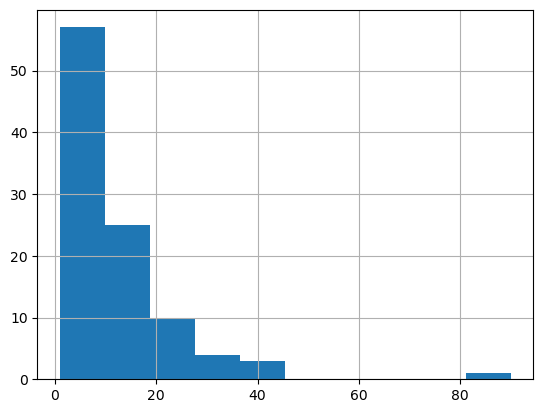

In [148]:
df.title_lengths.hist()

Title lengths close to exponential distribution, might have to normalize.

<AxesSubplot:>

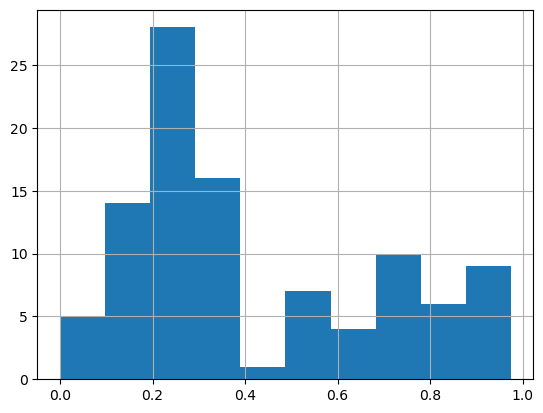

In [149]:
df.release_date_quantized.hist()

<AxesSubplot:>

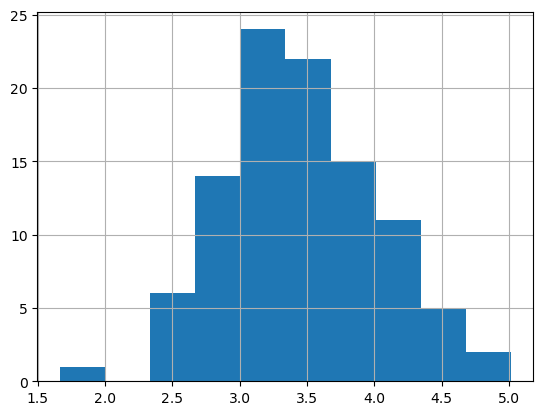

In [150]:
df.song_length.hist()

<AxesSubplot:>

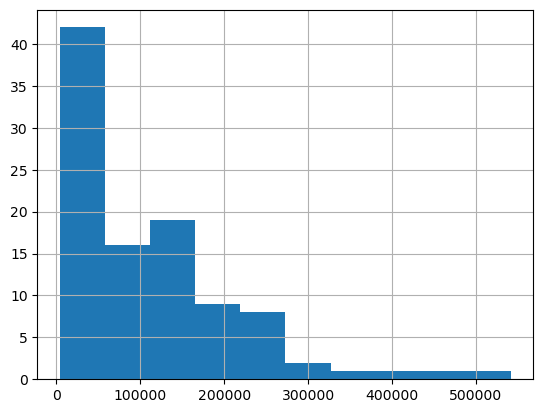

In [151]:
df.num_likes.hist()

Also close to exponential

<AxesSubplot:>

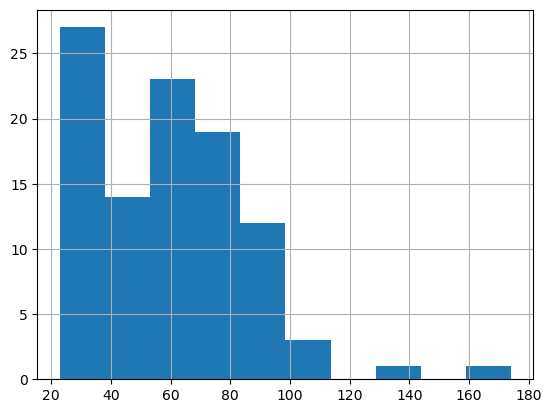

In [152]:
df.lyric_lengths.hist()

<AxesSubplot:>

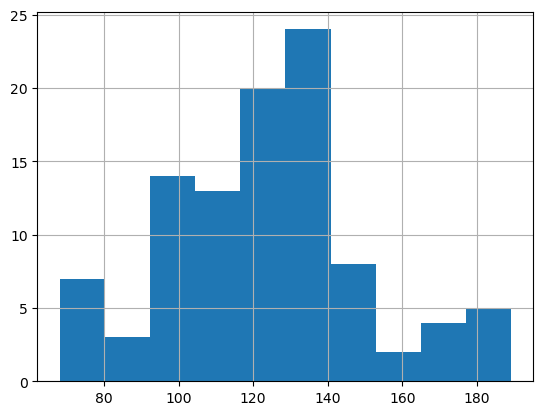

In [153]:
df.tempo.hist()

<AxesSubplot:>

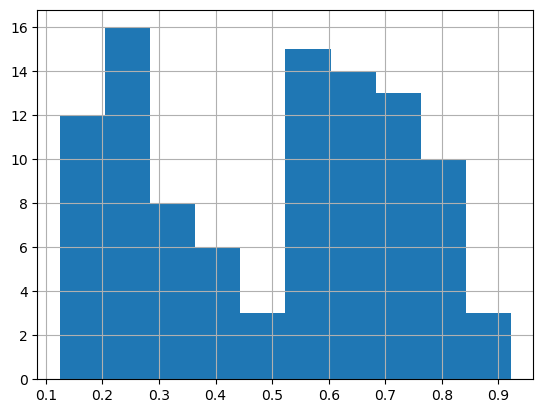

In [154]:
df.valence.hist()

<AxesSubplot:>

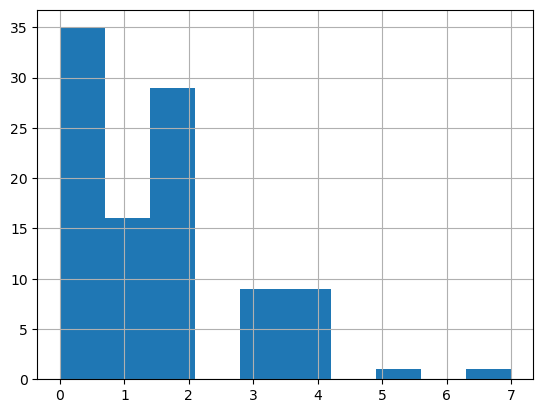

In [155]:
df.num_promos.hist()

<AxesSubplot:>

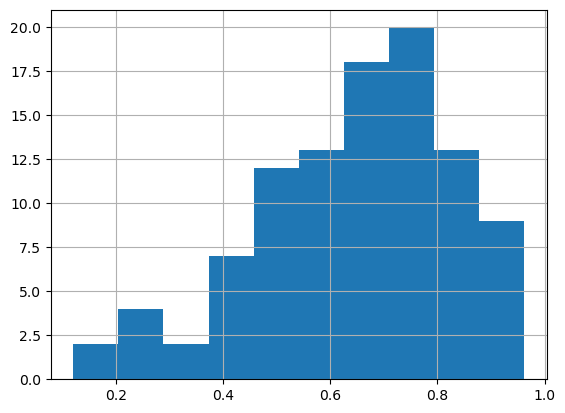

In [156]:
df.energy.hist()

<AxesSubplot:>

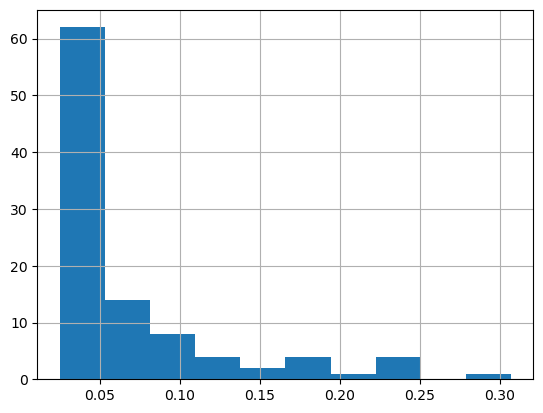

In [157]:
df.speechiness.hist()

## We can explore the relationship between release date, genre, and number of likes a bit more. Koreans might prefer a certain genre during certain times of the year.

In [388]:
def to_season(date):
    if (pd.isna(date)):
        return 'na'
    else:
        ymd = date.split('.')
        if (ymd != 3):
            return 'na'
        else:
            if (int(ymd[1]) >= 12 or int(ymd[1]) <= 2):
                return 'winter'
            elif (int(ymd[1]) >= 3 and int(ymd[1]) <= 5):
                return 'spring'
            elif (int(ymd[1]) >= 6 and int(ymd[1]) <= 8):
                return 'summer'
            elif (int(ymd[1]) >= 9 and int(ymd[1]) <= 11):
                return 'autumn'
            else:
                return 'na'
    
df['release_season'] = df.release_date.apply(lambda x: to_season(x))

In [389]:
display(df)

,titles,title_lengths,artists,release_date,release_date_quantized,genres,num_comments,num_likes,num_promos,follower_counts,lyric_lengths,song_length,tempo,time_signature,key,mode,valence,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,release_season
0,사랑하기 싫어,7,지아,2023.02.24,0.150838,발라드,289,28217,0,38357,32,3.669550,133.722,4/4,F,Major,0.311,0.442,0.692,-3.886,0.0473,0.729,0.000000,0.1850,na
1,너를 보는게 지친 하루에,13,송하예,2023.03.19,0.215084,발라드,0,15463,2,16406,30,3.762883,75.337,4/4,B,Major,0.256,0.437,0.560,-3.325,0.0301,0.365,0.000000,0.1780,na
2,사랑인가 봐,6,멜로망스,2022.02.18,0.134078,"발라드, 국내드라마",256,181361,2,87991,24,3.083333,171.594,4/4,G#,Major,0.631,0.402,0.731,-3.529,0.0693,0.508,0.000000,0.1460,na
3,너의 모든 순간,8,성시경,2014.02.12,0.117318,"발라드, 국내드라마",453,257711,0,116656,30,4.055400,139.982,4/4,A#,Major,0.244,0.366,0.385,-7.952,0.0336,0.816,0.000000,0.0872,na
4,나비무덤,4,포맨 (4MEN),2023.03.01,0.164804,발라드,93,16493,2,42728,50,4.488883,68.197,4/4,E,Major,0.189,0.466,0.503,-4.868,0.0367,0.555,0.000000,0.1300,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,거미가 줄을 타고 올라갑니다,15,뽀로로,2017.05.10,0.357542,"키즈, 창작동요",1,2076,1,13119,18,0.886400,124.991,4/4,E,Major,0.970,0.915,0.627,-5.180,0.0403,0.732,0.000000,0.1550,na
2027,하츄핑송,4,조경이,2021.01.29,0.075419,"키즈, 창작동요",9,3588,0,48,18,1.738467,130.048,4/4,C,Major,0.734,0.884,0.737,-4.910,0.0968,0.289,0.000000,0.3320,na
2028,반짝반짝 캐치! 티니핑 주제곡,16,이정은,2021.09.15,0.706704,"애니메이션/웹툰, 키즈, 만화",6,4276,1,357,18,1.353150,127.265,4/4,F#,Minor,0.918,0.716,0.899,-5.052,0.0685,0.081,0.000004,0.0392,na
2029,나비야,3,핑크퐁,2015.08.01,0.583799,"키즈, 창작동요",1,1809,0,11789,0,1.055133,159.919,4/4,B,Major,0.796,0.616,0.696,-4.176,0.0587,0.220,0.000000,0.2920,na


In [257]:
# Comparison of average number of likes across genres
df_pivots = df[['genres', 'release_season']]

In [258]:
for i in df_pivots:
    print(i)
    print(pd.pivot_table(df, index=i, values='num_likes', aggfunc='mean').sort_values('num_likes', ascending=False))
    print('\n')

genres
                      num_likes
genres                         
발라드, 국내드라마        195222.466667
발라드, 랩/힙합, 국내드라마  162229.000000
발라드, 국내영화         133542.000000
댄스                120595.448718
발라드                93965.405405
댄스, 랩/힙합           91778.500000
발라드, 인디음악          85798.777778


release_season
                    num_likes
release_season               
summer          153793.031250
autumn          148025.478261
spring          102167.657143
winter           92037.090909




Songs released in the summer are more popular on average. Ballad/K-drama genres also seem to be significantly more popular.

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [260]:
df = df.drop(['titles', 'artists', 'release_date', 'num_comments'], axis=1)

In [279]:
# Convert categorical to numerical
df = pd.get_dummies(df)

X = df.drop('num_likes', axis=1)
y = df['num_likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.44, random_state=42)

# Training our model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 6283386926.613879
